In [1]:
import os

import sys
import logging
import numpy as np
import pandas as pd
import IPython.display as ipd

import librosa
import librosa.display

In [2]:
def isnotebook():
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter

currentdir = os.path.dirname(os.path.realpath("__file__"))
parentdir = os.path.dirname(currentdir)
if isnotebook():
    sys.path.append(parentdir)
    sys.path.insert(0, parentdir)
else:
    sys.path.insert(0, currentdir)
    print(currentdir)

In [3]:
logging.root.handlers = []
logging.basicConfig(
    level=logging.INFO,
    handlers=[
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

In [4]:
from anAIlysis import ESA
from anAIlysis import signal_processing as DSP
# from anAIlysis import plotting as eplt
# from anAIlysis import signal_analysis as SA
from anAIlysis import get_samplerate as GSR
from anAIlysis import file_handler as fh

np.random.seed(seed=42)

In [5]:
# Use WebAgg if no display is connected (e.g. ssh) and not running as notebook
import matplotlib
if (os.name == 'posix' and "DISPLAY" not in os.environ) and not isnotebook():
    matplotlib.use('WebAgg')
elif isnotebook():
    try:
        get_ipython().run_line_magic('matplotlib', 'widget')
    except ModuleNotFoundError:
        get_ipython().run_line_magic('matplotlib', 'inline')

# Return used Matplotlib backend
logger.info(f"Matplotlib backend: {matplotlib.get_backend()}")

import matplotlib.pyplot as plt

INFO:__main__:Matplotlib backend: module://ipympl.backend_nbagg


In [6]:
filepath = "data/Testmessung_fuer_Sazan_2023-01-24.csv"

if isnotebook():
    filepath = os.path.join(parentdir, filepath)

df, meta = fh.get_pico_dataframe(filepath, german=True)

In [7]:
resistance = 1
damping = 10

u_1 = df["Kanal A"] * damping
u_2 = df["Kanal C"] * damping
u_3 = df["Kanal E"] * damping

i_1 = (df["Kanal A"] - df["Kanal B"]) * damping / resistance
i_2 = (df["Kanal C"] - df["Kanal D"]) * damping / resistance
i_3 = (df["Kanal E"] - df["Kanal F"]) * damping / resistance

df_cal = pd.DataFrame({
    "U_1": u_1,
    "U_2": u_2,
    "U_3": u_3,
    "I_1": i_1,
    "I_2": i_2,
    "I_3": i_3,
})

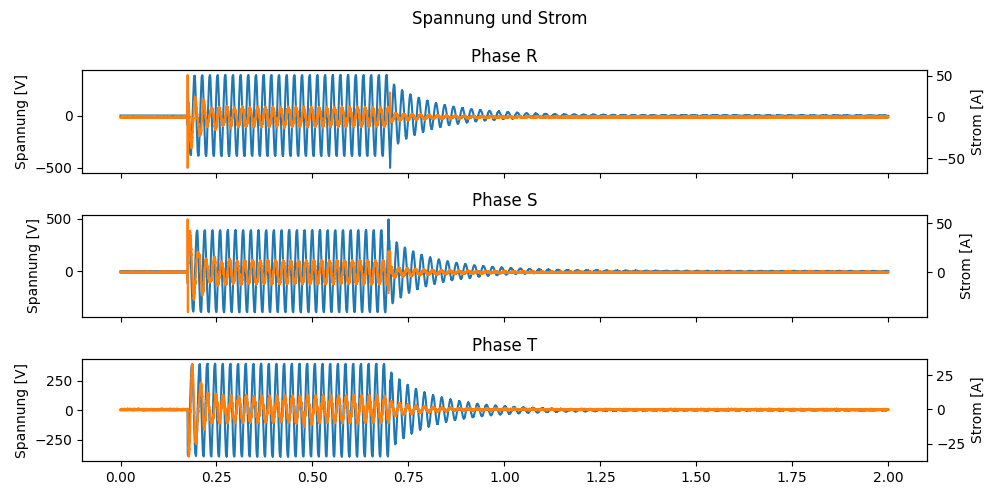

In [8]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 5), sharex=True)

phase_description = ["R", "S", "T"]

for i, ax in enumerate(axs):
    color_cycle = ax._get_lines.prop_cycler
    ax.plot(df_cal.index, df_cal[f"U_{i+1}"], label=f"U_{i+1}")
    ax.set_ylabel("Spannung [V]")
    ax1 = ax.twinx()
    ax1.plot(df_cal.index, df_cal[f"I_{i+1}"], label=f"I_{i+1}", color=next(color_cycle)["color"])
    ax1.set_ylabel("Strom [A]")
    ax.set_title(f"Phase {phase_description[i]}")

fig.suptitle('Spannung und Strom')
fig.tight_layout()

In [9]:
t_start = 0.3
t_end = 0.6
for i in range(3):
    df_cal = df_cal[(df_cal.index > t_start) & (df_cal.index < t_end)]
    u_rms = DSP.rms(df_cal[f"U_{i+1}"])
    i_rms = DSP.rms(df_cal[f"I_{i+1}"])
    print(f"Phase {phase_description[i]}: U_rms = {u_rms:.2f} V, I_rms = {i_rms:.2f} A")

Phase R: U_rms = 275.57 V, I_rms = 8.03 A
Phase S: U_rms = 277.71 V, I_rms = 8.35 A
Phase T: U_rms = 278.28 V, I_rms = 6.55 A


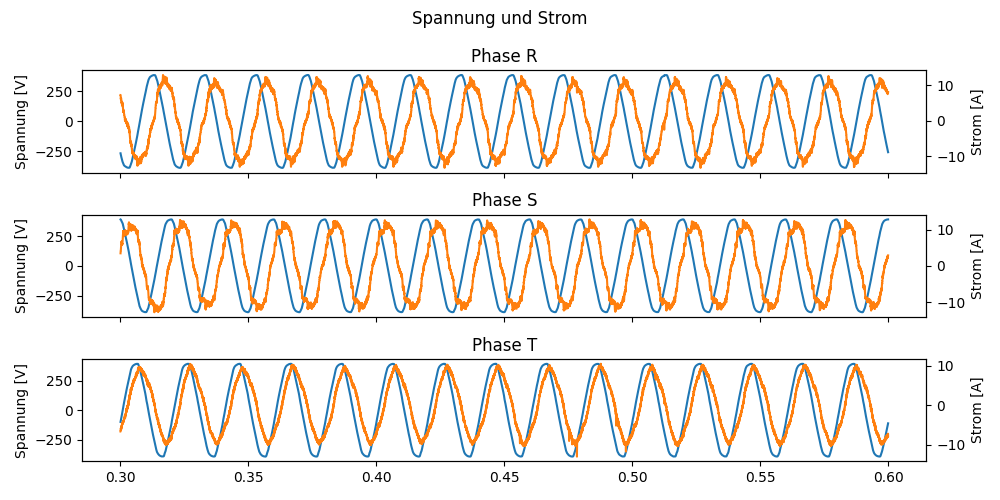

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 5), sharex=True)

phase_description = ["R", "S", "T"]

for i, ax in enumerate(axs):
    color_cycle = ax._get_lines.prop_cycler
    ax.plot(df_cal.index, df_cal[f"U_{i+1}"], label=f"U_{i+1}")
    ax.set_ylabel("Spannung [V]")
    ax1 = ax.twinx()
    ax1.plot(df_cal.index, df_cal[f"I_{i+1}"], label=f"I_{i+1}", color=next(color_cycle)["color"])
    ax1.set_ylabel("Strom [A]")
    ax.set_title(f"Phase {phase_description[i]}")

fig.suptitle('Spannung und Strom')
fig.tight_layout()

In [11]:
if not isnotebook():
    plt.show()